In [312]:
# Импорт Гугл-диска в среду Collab
#from google.colab import drive
#drive.mount('/content/drive')

In [16]:
#!pip install tensorflow

In [1]:
from pandas import read_csv, DataFrame
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
vcf_csv_dir = '/home/skomlev/data/vcf_csv'
X4_path = vcf_csv_dir + '/X4.csv'

In [6]:
dataset = read_csv(X4_path)
dataset

,CHROM_num,POS,QUAL,GQ,DP,AD_ref,AD_alt,VAF,PL_0/0,PL_0/1,PL_1/1,ref_alt_diff,is_valid
0,1,10352,4.0,3,6,3,2,0.333333,0,5,0,1,False
1,1,10389,7.2,3,7,4,2,0.285714,4,2,0,1,False
2,1,13613,13.3,10,5,0,5,1.000000,12,13,0,0,False
3,1,13684,13.8,11,3,0,3,1.000000,13,13,0,0,False
4,1,13813,11.6,9,5,0,5,1.000000,11,12,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584937,22,50807889,25.1,25,10,0,9,0.900000,25,40,0,0,False
4584938,22,50807905,4.2,4,9,2,7,0.777778,2,14,0,0,False
4584939,22,50807909,4.6,4,10,3,7,0.700000,2,16,0,0,False
4584940,22,50807933,5.5,5,13,10,3,0.230769,3,0,11,0,False


In [7]:
dataset.dtypes

CHROM_num         int64
POS               int64
QUAL            float64
GQ                int64
DP                int64
AD_ref            int64
AD_alt            int64
VAF             float64
PL_0/0            int64
PL_0/1            int64
PL_1/1            int64
ref_alt_diff      int64
is_valid           bool
dtype: object

In [8]:
#разделение входных и выходных данных
trg = dataset[['is_valid']]
# выходные данные
print (trg)

         is_valid
0           False
1           False
2           False
3           False
4           False
...           ...
4584937     False
4584938     False
4584939     False
4584940     False
4584941     False

[4584942 rows x 1 columns]


In [9]:
# убираем столбец D1
trn = dataset.drop(['is_valid'], axis=1)
# матрица входных параметров
print (trn)

         CHROM_num       POS  QUAL  GQ  DP  AD_ref  AD_alt       VAF  PL_0/0  \
0                1     10352   4.0   3   6       3       2  0.333333       0   
1                1     10389   7.2   3   7       4       2  0.285714       4   
2                1     13613  13.3  10   5       0       5  1.000000      12   
3                1     13684  13.8  11   3       0       3  1.000000      13   
4                1     13813  11.6   9   5       0       5  1.000000      11   
...            ...       ...   ...  ..  ..     ...     ...       ...     ...   
4584937         22  50807889  25.1  25  10       0       9  0.900000      25   
4584938         22  50807905   4.2   4   9       2       7  0.777778       2   
4584939         22  50807909   4.6   4  10       3       7  0.700000       2   
4584940         22  50807933   5.5   5  13      10       3  0.230769       3   
4584941         22  50808026   5.5   5   4       1       2  0.500000       3   

         PL_0/1  PL_1/1  ref_alt_diff  

In [19]:
# разделение на обучающее и тестовое
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.2, random_state=42)

print('Xtrn')
print(Xtrn.shape)
print(Xtrn)
print('Ytrn')
print(Ytrn)

print('Xtest')
print(Xtest.shape)
print(Xtest)
print('Ytest')
print(Ytest)


# Xtrn.to_excel('./training.xlsx')
# Xtest.to_excel('./testing.xlsx')
# Ytrn.to_excel('./Ytraining.xlsx')
# Ytest.to_excel('./Ytesting.xlsx')


Xtrn
(3667953, 12)
         CHROM_num        POS  QUAL  GQ  DP  AD_ref  AD_alt       VAF  PL_0/0  \
100273           1   65991442  60.2  57  39       0      39  1.000000      60   
4372910         20   16396180  44.4  44  32      17      15  0.468750      44   
2086013          7   67701794  40.4  40  34      17      17  0.500000      40   
2092278          7   71298807  38.3  38  21      10      11  0.523810      38   
245633           1  174768559  33.2  33  38      24      14  0.368421      33   
...            ...        ...   ...  ..  ..     ...     ...       ...     ...   
1136074          4   49135974  13.2  13  77       5      66  0.857143      12   
1570006          5  117705756  52.7  41  18       0      17  0.944444      52   
2234489          8    2380271  13.5  13  55      31      24  0.436364      13   
4304572         19   37224802  47.2  47  45      30      14  0.311111      47   
1692743          6   11894403  58.8  58  33       0      33  1.000000      58   

        

In [20]:
#  Стандартизация Xtrn, Xtest 
mean = Xtrn.mean(axis=0)
std = Xtrn.std(axis=0)
# вычитаем среднее значение по столбцу
Xtrn -= mean
# делим на стандартное отклонением
Xtrn /= std
Xtest -= mean
Xtest /= std
# Теперь каждый вх параметр имеет нулевое среднее и стандартное отклонение = 1

print('Xtrn')
print(Xtrn)
print('Xtest')
print(Xtest)
print('mean')
print(mean)
print('std')
print(std)
Xtrn.shape

Xtrn
         CHROM_num       POS      QUAL        GQ        DP    AD_ref  \
100273   -1.337617 -0.200133  1.045211  0.995818  0.597469 -1.063550   
4372910   1.934245 -1.081159 -0.087881  0.030163 -0.052972  0.730324   
2086013  -0.304397 -0.169750 -0.374740 -0.266961  0.132869  0.730324   
2092278  -0.304397 -0.105852 -0.525341 -0.415523 -1.075093 -0.008330   
245633   -1.337617  1.732217 -0.891086 -0.786929  0.504549  1.468978   
...            ...       ...       ...       ...       ...       ...   
1136074  -0.821007 -0.499559 -2.325380 -2.272551  4.128435 -0.535940   
1570006  -0.648804  0.718536  0.507351 -0.192680 -1.353854 -1.063550   
2234489  -0.132194 -1.330142 -2.303866 -2.272551  2.084192  2.207632   
4304572   1.762042 -0.711153  0.112920  0.253007  1.154990  2.102110   
1692743  -0.476601 -1.161130  0.944810  1.070099  0.039948 -1.063550   

           AD_alt       VAF    PL_0/0    PL_0/1    PL_1/1  ref_alt_diff  
100273   1.475441  1.218392  1.058765  1.381655 -1.15440

(3667953, 12)

In [21]:
# # # #     ПРОЕКТИРОВАНИЕ МОДЕЛИ    # # # # # # # # # # # # # # # # # # # # # # #
# подключаем керас
import numpy as np
# метод обучения
from tensorflow.keras.optimizers import Adam
# модель персептрона
from tensorflow.keras.models import Sequential
# слои персептрона, дропаут-регуляризация
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
# гребневая регуляризация
from tensorflow.keras import regularizers
#import matplotlib.pyplot as plt

# Преобразуем формат множеств в формат numpy
x_train = Xtrn.to_numpy()
y_train = Ytrn.to_numpy()

x_test = Xtest.to_numpy()
y_test = Ytest.to_numpy()

#   ПРОЕКТИРУЕМ МОДЕЛЬ
# персептрон
model = Sequential()
# первый слой 7 параметров, активационная функция гиперболич. тангенс
model.add(Dense(7, activation="tanh"))
# дропаут-регуляризация
# model.add(Dropout(0.01))
# скрытый слой
model.add(Dense(2, kernel_regularizer=regularizers.L1(0.001), activation="tanh"))
# выходной слой один нейрон, активат функция линейная по умолчанию
model.add(Dense(1))

# максимальная ошибка
from sklearn.metrics import max_error

#model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=["mae"])
#model.compile(loss='mean_squared_error', optimizer='Adam', metrics=["mae"])
model.compile(optimizer=Adam(learning_rate=0.006, beta_1=0.9, beta_2=0.999, amsgrad=False), loss="mse", metrics=["mae"])
#  mae - mean absolute error (Средняя абсолютная ошибка)






In [ ]:
# # # #     ОБУЧЕНИЕ НЕЙРОСЕТИ    # # # # # # # # # # # # # # # # # # # # # # #
# validation_split для расщепление обучающего множества на обучающее и валидирующее
history = model.fit(x_train, y_train, validation_split=0.10, verbose=1, epochs=100)
# history = model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/100
103162/103162 [==============================] - 106s 1ms/step - loss: 0.0648 - mae: 0.1277 - val_loss: 0.0641 - val_mae: 0.1207
Epoch 2/100
103162/103162 [==============================] - 105s 1ms/step - loss: 0.0647 - mae: 0.1273 - val_loss: 0.0640 - val_mae: 0.1336
Epoch 3/100
103162/103162 [==============================] - 105s 1ms/step - loss: 0.0647 - mae: 0.1272 - val_loss: 0.0641 - val_mae: 0.1251
Epoch 4/100
103162/103162 [==============================] - 105s 1ms/step - loss: 0.0647 - mae: 0.1271 - val_loss: 0.0643 - val_mae: 0.1238
Epoch 5/100
103162/103162 [==============================] - 105s 1ms/step - loss: 0.0647 - mae: 0.1271 - val_loss: 0.0650 - val_mae: 0.1257
Epoch 6/100
103162/103162 [==============================] - 104s 1ms/step - loss: 0.0647 - mae: 0.1271 - val_loss: 0.0644 - val_mae: 0.1265
Epoch 7/100
103162/103162 [==============================] - 105s 1ms/step - loss: 0.0647 - mae: 0.1270 - val_loss: 0.0642 - val_mae: 0.1363
Epoch 8/100
1

In [ ]:
from joblib import dump, load
import pickle

In [ ]:
def save_sklearn_model(model, out_path: str, gzip = True):
    pickle.dump(model, open(out_path, 'wb'))
    !gzip $out_path

In [ ]:
models_dir = '/home/skomlev/models'

In [ ]:
save_sklearn_model(model, models_dir + '/NN_def_by_ded.sav')

In [ ]:
save_sklearn_model(history, models_dir + '/history_def_by_ded.sav')

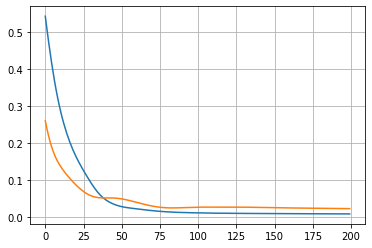

In [322]:

# строим График функции потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid(True)
plt.show()




In [323]:
# Проверка на тестовом множестве
predictions = model.predict(x_test)
print(y_test.shape)

print('y_test')
print(y_test)
print('predictions')
print(predictions)

1/1 [==============================] - 0s 81ms/step
(5, 1)
y_test
[[0]
 [0]
 [1]
 [1]
 [0]]
predictions
[[ 0.20373648]
 [-0.1204702 ]
 [ 1.0030417 ]
 [ 1.0170269 ]
 [-0.00994688]]


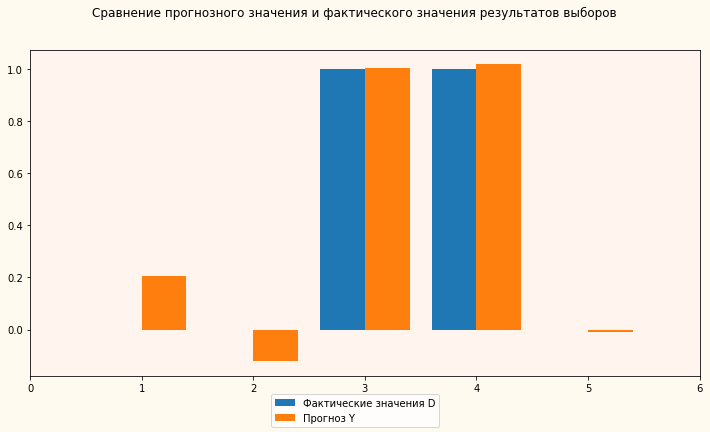

In [324]:
def GlDiagram(n):
  # построение графика сравнения прогнозируемых значений и тестовых (фактических) значений
  # Входные данные: y_test, prediсtion 
  # n - количество выводимых значений
 
  %matplotlib inline
  import numpy as np
  import matplotlib.pyplot as plt

  #  Задаем смещение равное половине ширины прямоугольника:
  x1 = np.arange(1, n) - 0.2
  x2 = np.arange(1, n) + 0.2

  #y1 = Ytest.to_numpy().flatten()[:n-1]
  #y2 = predition.flatten()[:n-1]
  
  y1 = y_test.flatten()[:n-1]
  y2 = predictions.flatten()[:n-1] 

  
  fig, ax = plt.subplots()

  ax.bar(x1, y1, width = 0.4)
  ax.bar(x2, y2, width = 0.4)

  ax.set_facecolor('seashell')
  fig.set_figwidth(12)    #  ширина Figure
  fig.set_figheight(6)    #  высота Figure
  fig.set_facecolor('floralwhite')
  fig.suptitle("Сравнение прогнозного значения и фактического значения результатов выборов")
  fig.legend(["Фактические значения D", "Прогноз Y"], loc = "lower center")
  plt.xlim([0,n])
  plt.show()
 
# Запуск процедуры:
GlDiagram(n=6)

In [325]:
print(y_test.shape)

(5, 1)


********       ОЦЕНКА КАЧЕСТВА МОДЕЛИ   ************************************

In [326]:
# Вычисление коэффициент детерминации
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('r2=', r2)

r2= 0.952983557408619


In [327]:
# Вычисление абсолютной максимальной ошибки (max_error)
from sklearn.metrics import max_error
print(y_test.shape)
print(predictions.shape)
max_error = max_error(y_test, predictions)
print('max_error =', max_error)

(5, 1)
(5, 1)
max_error = 0.20373648405075073


In [328]:
#  Вычисление средней абсолютной ощибки (mean_absolute_error (MAE))
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(y_test, predictions)
print('mean_absolute_error =', mean_absolute_error)

mean_absolute_error = 0.07084444165229797


In [329]:
#  Вычисление медианной абсолютной ощибки (median_absolute_error)
from sklearn.metrics import median_absolute_error
median_absolute_error = median_absolute_error(y_test, predictions)
print ("median_absolute_error=", median_absolute_error)

median_absolute_error= 0.017026901245117188


In [330]:
# Вычисление среднекваратичной ошибки (MSE и RMSE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions)
print('MSE=', MSE)

from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, predictions))
print('RMSE=', RMSE)

MSE= 0.011283946221931452
RMSE= 0.10622592066878711


++++++++++     СОХРАНЕНИЕ СЕТИ       ++++++++++++++

In [331]:
# Сохранение сети
model.save('NeuroSet', save_format='h5') 

In [332]:
Xtrn.to_csv('Trn.csv')

In [333]:
#  Загрузка нейросети из файла
from tensorflow.keras.models import load_model
model = load_model('NeuroSet')

# Применение сети
predictions = model.predict(x_test)
print('y_test')
print(y_test)
print('predictions')
print(predictions)


1/1 [==============================] - 0s 65ms/step
y_test
[[0]
 [0]
 [1]
 [1]
 [0]]
predictions
[[ 0.20373648]
 [-0.1204702 ]
 [ 1.0030417 ]
 [ 1.0170269 ]
 [-0.00994688]]


In [334]:
# Прогнозирование влияния возраста на рейтинг мэра (Подготовка)
# Формирование входных параметров модели
x_input = read_csv('! The influence of age.csv',';')
print(x_input)

    X1  X2  X3  X4  X5  X6  X7
0    1  42   1   0   9   8   0
1    1  44   1   0   9   8   0
2    1  46   1   0   9   8   0
3    1  48   1   0   9   8   0
4    1  50   1   0   9   8   0
5    1  52   1   0   9   8   0
6    1  54   1   0   9   8   0
7    1  56   1   0   9   8   0
8    1  58   1   0   9   8   0
9    1  60   1   0   9   8   0
10   1  62   1   0   9   8   0
11   1  64   1   0   9   8   0
12   1  66   1   0   9   8   0
13   1  68   1   0   9   8   0
14   1  70   1   0   9   8   0
15   1  72   1   0   9   8   0
16   1  74   1   0   9   8   0
17   1  76   1   0   9   8   0
18   1  78   1   0   9   8   0
19   1  80   1   0   9   8   0


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [335]:
# Формирование оси абсцисс (Возраст)
Age = x_input[['X2']]
print (Age)

    X2
0   42
1   44
2   46
3   48
4   50
5   52
6   54
7   56
8   58
9   60
10  62
11  64
12  66
13  68
14  70
15  72
16  74
17  76
18  78
19  80


In [336]:
# Стандартизация входных параметров
x_input -= mean
x_input /= std
print(x_input)

# Преобразование в формат numpy
x_inp = x_input.to_numpy()
predictions = model.predict(x_inp)
print(predictions)

          X1        X2        X3        X4        X5        X6        X7
0  -0.502188 -0.294761 -0.988376 -0.364894  0.828972  0.435141 -0.437798
1  -0.502188 -0.117905 -0.988376 -0.364894  0.828972  0.435141 -0.437798
2  -0.502188  0.058952 -0.988376 -0.364894  0.828972  0.435141 -0.437798
3  -0.502188  0.235809 -0.988376 -0.364894  0.828972  0.435141 -0.437798
4  -0.502188  0.412666 -0.988376 -0.364894  0.828972  0.435141 -0.437798
5  -0.502188  0.589523 -0.988376 -0.364894  0.828972  0.435141 -0.437798
6  -0.502188  0.766380 -0.988376 -0.364894  0.828972  0.435141 -0.437798
7  -0.502188  0.943236 -0.988376 -0.364894  0.828972  0.435141 -0.437798
8  -0.502188  1.120093 -0.988376 -0.364894  0.828972  0.435141 -0.437798
9  -0.502188  1.296950 -0.988376 -0.364894  0.828972  0.435141 -0.437798
10 -0.502188  1.473807 -0.988376 -0.364894  0.828972  0.435141 -0.437798
11 -0.502188  1.650664 -0.988376 -0.364894  0.828972  0.435141 -0.437798
12 -0.502188  1.827520 -0.988376 -0.364894  0.82897

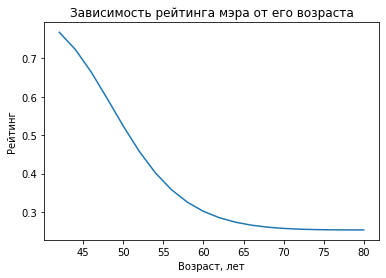

In [337]:
# рисуем график
from matplotlib import pyplot as plt   
   
x = Age  
y = predictions

plt.plot(x,y)   
plt.title("Зависимость рейтинга мэра от его возраста")   
plt.ylabel('Рейтинг')   
plt.xlabel('Возраст, лет')   
plt.show() 

In [338]:
# Прогнозирование влияния возраста и кол-ва детей на рейтинг мэра (Подготовка)
# Формирование входных параметров модели

x2_input = read_csv('! The influence of childrens.csv',';')
# print(x2_input)

# Формирование оси абсцисс (Возраст)
Age2 = x2_input[['X2']]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [339]:
# Стандартизация входных параметров
x2_input -= mean
x2_input /= std
# print(x2_input)

# Преобразование в numpy
x2_inp = x2_input.to_numpy()
predictions2 = model.predict(x2_inp)
# print(predictions2)

1/1 [==============================] - 0s 29ms/step


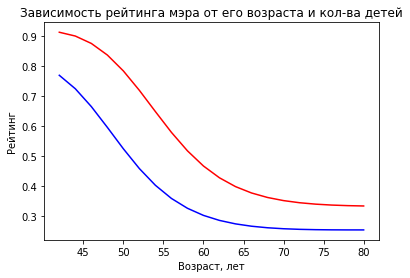

In [340]:
from matplotlib import pyplot as plt   
   
x = Age 
x2 = Age2 
y = predictions
y2 = predictions2

plt.plot(x, y, 'b', label='Один ребенок')
plt.plot(x2, y2, 'r', label='Два ребенка')      
plt.title("Зависимость рейтинга мэра от его возраста и кол-ва детей")   
plt.ylabel('Рейтинг')   
plt.xlabel('Возраст, лет')   
plt.show() 

In [341]:
# Прогнозирование влияния возраста и кол-ва детей на рейтинг мэра (Подготовка)
# Формирование входных параметров модели

x3_input = read_csv('! The influence of childrens3.csv',';')
# print(x3_input)

# Формирование оси абсцисс (Возраст)
Age3 = x3_input[['X2']]

# Стандартизация входных параметров
x3_input -= mean
x3_input /= std
# print(x3_input)

# Преобразование в numpy
x3_inp = x3_input.to_numpy()
predictions3 = model.predict(x3_inp)
# print(predictions3)

1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


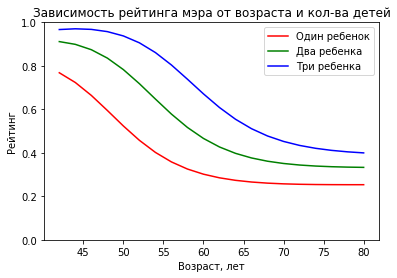

In [342]:
from matplotlib import pyplot as plt   
   
x = Age 
x2 = Age2
x3 = Age3
y = predictions
y2 = predictions2
y3 = predictions3

plt.plot(x, y, 'r', label='Один ребенок')
plt.plot(x2, y2, 'g', label='Два ребенка')
plt.plot(x3, y3, 'b', label='Три ребенка')    
plt.title("Зависимость рейтинга мэра от возраста и кол-ва детей")   
plt.ylabel('Рейтинг')
plt.xlabel('Возраст, лет')
plt.ylim([0,1])
plt.legend(["Один ребенок", "Два ребенка", "Три ребенка"])
plt.show()